In [1]:
#load dataset from csv
import pandas as pd
df = pd.read_csv("C:/Users/user/Downloads/odi.csv")


In [2]:
df.shape


(350899, 15)

In [3]:
df.head(10)


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301
5,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.6,6,0,0,0,301
6,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,6,0,1.1,6,0,0,0,301
7,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,6,0,1.2,6,0,0,0,301
8,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,6,0,1.3,6,0,0,0,301
9,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,7,0,1.3,7,0,0,0,301


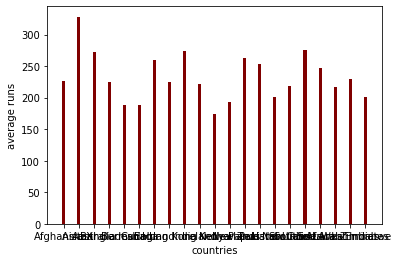

In [4]:
#use groupup and bar graphs
import matplotlib.pyplot as plt
gk = df.groupby(['bat_team' ,'total']).sum().reset_index().groupby('bat_team').mean()
#print(gk)
y=gk['total']
x = ['Afghanistan' ,         

     'Asia XI',                
'Australia',             
'Bangladesh',              
'Bermuda'    ,             
'Canada'      ,            
'England'      ,           
'Hong Kong',               
'India',                   
'Ireland' ,                
'Kenya' ,                  
'Netherlands' ,            
'New Zealand',           
'Pakistan',                
'Papua New Guinea',  
'Scotland' ,             
'South Africa' ,          
'Sri Lanka' ,             
'United Arab Emirates',   
'West Indies',           
'Zimbabwe'               ]

plt.bar(x , y, color ='maroon', width=0.2)
plt.xlabel('countries')
plt.ylabel('average runs')
plt.show()


In [5]:
#data cleaning 
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

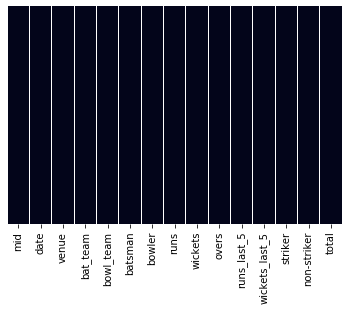

In [6]:
#DATA CLEANING VIA heatmap
import seaborn as sns 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# no null values present in the data.


In [7]:
#Feature Selection 
df.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301
5,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.6,6,0,0,0,301
6,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,6,0,1.1,6,0,0,0,301
7,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,6,0,1.2,6,0,0,0,301
8,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,6,0,1.3,6,0,0,0,301
9,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,7,0,1.3,7,0,0,0,301


# one hot encoding and count encoding on high cardnality features .


In [8]:
len(df['venue'].unique())

136

In [9]:
len(df['bat_team'].unique())


21

In [10]:
len(df['batsman'].unique())

938

In [11]:
len(df['bowler'].unique())


709

In [12]:
# only to columns bat_team , bowl_team
bat = pd.get_dummies(df['bat_team'], prefix ={'x3':'x3'})
bowl= pd.get_dummies(df['bowl_team'], prefix ={'x4': 'x4'})
df= df.join(bat)
df= df.join(bowl)
df= df.drop(['bat_team','bowl_team'],axis=1)

import datetime as dt
df["date"]=pd.to_datetime(df["date"])
df["date"]=df["date"].map(dt.datetime.toordinal)
df.shape

(350899, 55)

# the features having lots of categorical values have to be count vectorised

In [13]:
venue_frequency = df.venue.value_counts().to_dict()
batsman_frequency = df.batsman.value_counts().to_dict()
bowler_frequency = df.bowler.value_counts().to_dict()

In [14]:
df.venue = df.venue.map(venue_frequency)
df.batsman= df.batsman.map(batsman_frequency)
df.bowler = df.bowler.map(bowler_frequency)

In [15]:
df.head()

,mid,date,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,...,{'x4': 'x4'}_Netherlands,{'x4': 'x4'}_New Zealand,{'x4': 'x4'}_Pakistan,{'x4': 'x4'}_Papua New Guinea,{'x4': 'x4'}_Scotland,{'x4': 'x4'}_South Africa,{'x4': 'x4'}_Sri Lanka,{'x4': 'x4'}_United Arab Emirates,{'x4': 'x4'}_West Indies,{'x4': 'x4'}_Zimbabwe
0,1,732475,2542,279,733,0,0,0.1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,732475,2542,279,733,0,0,0.2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,732475,2542,279,733,4,0,0.3,4,0,...,0,0,0,0,0,0,0,0,0,0
3,1,732475,2542,279,733,6,0,0.4,6,0,...,0,0,0,0,0,0,0,0,0,0
4,1,732475,2542,279,733,6,0,0.5,6,0,...,0,0,0,0,0,0,0,0,0,0


# final feature selection


In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X= df.iloc[:,0:54]
y = df['total']

In [17]:
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(X,y)



In [18]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [19]:
featureScores = pd.concat([dfcolumns , dfscores], axis =1)
featureScores.columns=['specs','score']

In [20]:
featureScores

,specs,score
0,mid,1.642865e+07
1,date,1.859782e+05
2,venue,4.094680e+08
3,batsman,5.529526e+07
4,bowler,2.294538e+07
5,runs,1.922727e+06
6,wickets,7.719529e+04
7,overs,4.874536e+04
8,runs_last_5,3.446994e+05
9,wickets_last_5,1.633041e+04


# redundant features like runs_last_5 , wickets_last_5 should be removed 


In [21]:
df= df.drop(['runs_last_5', 'wickets_last_5'],axis=1)


In [33]:
len(df['mid'].unique())

1188

In [22]:
df.head()

,mid,date,venue,batsman,bowler,runs,wickets,overs,striker,non-striker,...,{'x4': 'x4'}_Netherlands,{'x4': 'x4'}_New Zealand,{'x4': 'x4'}_Pakistan,{'x4': 'x4'}_Papua New Guinea,{'x4': 'x4'}_Scotland,{'x4': 'x4'}_South Africa,{'x4': 'x4'}_Sri Lanka,{'x4': 'x4'}_United Arab Emirates,{'x4': 'x4'}_West Indies,{'x4': 'x4'}_Zimbabwe
0,1,732475,2542,279,733,0,0,0.1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,732475,2542,279,733,0,0,0.2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,732475,2542,279,733,4,0,0.3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,732475,2542,279,733,6,0,0.4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,732475,2542,279,733,6,0,0.5,0,0,...,0,0,0,0,0,0,0,0,0,0


# feature scaling for basically linear regression 

In [23]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaling.fit(df.drop('total',axis=1))
scalar_features= scaling.transform(df.drop('total',axis=1))
df_features = pd.DataFrame(scalar_features,columns=df.columns[:-1])
df_features.head()

,mid,date,venue,batsman,bowler,runs,wickets,overs,striker,non-striker,...,{'x4': 'x4'}_Kenya,{'x4': 'x4'}_Netherlands,{'x4': 'x4'}_New Zealand,{'x4': 'x4'}_Pakistan,{'x4': 'x4'}_Papua New Guinea,{'x4': 'x4'}_Scotland,{'x4': 'x4'}_South Africa,{'x4': 'x4'}_Sri Lanka,{'x4': 'x4'}_United Arab Emirates,{'x4': 'x4'}_West Indies
0,-1.72687,-1.536665,-0.624324,-1.008448,-0.659981,-1.478149,-1.294053,-1.682627,-1.251284,-0.827473,...,-0.087844,-0.284306,-0.32714,-0.041799,-0.096613,-0.305751,-0.319316,-0.106427,-0.304066,-0.270683
1,-1.72687,-1.536665,-0.624324,-1.008448,-0.659981,-1.478149,-1.294053,-1.675602,-1.251284,-0.827473,...,-0.087844,-0.284306,-0.32714,-0.041799,-0.096613,-0.305751,-0.319316,-0.106427,-0.304066,-0.270683
2,-1.72687,-1.536665,-0.624324,-1.008448,-0.659981,-1.426646,-1.294053,-1.668578,-1.251284,-0.827473,...,-0.087844,-0.284306,-0.32714,-0.041799,-0.096613,-0.305751,-0.319316,-0.106427,-0.304066,-0.270683
3,-1.72687,-1.536665,-0.624324,-1.008448,-0.659981,-1.400895,-1.294053,-1.661553,-1.251284,-0.827473,...,-0.087844,-0.284306,-0.32714,-0.041799,-0.096613,-0.305751,-0.319316,-0.106427,-0.304066,-0.270683
4,-1.72687,-1.536665,-0.624324,-1.008448,-0.659981,-1.400895,-1.294053,-1.654528,-1.251284,-0.827473,...,-0.087844,-0.284306,-0.32714,-0.041799,-0.096613,-0.305751,-0.319316,-0.106427,-0.304066,-0.270683



# train test split 

In [24]:
x = df_features
y = df['total']

In [25]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# linear regression


In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [27]:
reg.fit(x_train , y_train)
reg.score(x_test , y_test)

0.5849948060087868

# decision tree

In [28]:
from sklearn.tree import DecisionTreeRegressor
dec = DecisionTreeRegressor()
dec.fit(x_train,y_train)
dec.score(x_test , y_test)

0.9756744582098793

# random forest regressor 

In [29]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train , y_train )
forest.score(x_test , y_test)

0.9919629280124576